# Visualización y graficación de datos

In [1]:
import pandas as pd
pd.__version__

'1.4.0'

In [2]:
df = pd.read_csv('../data/covid_19_data.csv')
df.sample(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2879,2880,03/01/2020,British Columbia,Canada,2020-02-29T23:23:13,8.0,0.0,3.0
2016,2017,02/21/2020,NaN,Sweden,2020-02-01T02:13:26,1.0,0.0,0.0
1463,1464,02/14/2020,NaN,India,2020-02-13T18:53:02,3.0,0.0,0.0
1987,1988,02/21/2020,NaN,UK,2020-02-16T16:23:06,9.0,0.0,8.0
2279,2280,02/24/2020,"San Antonio, TX",US,2020-02-13T18:53:02,1.0,0.0,0.0
3197,3198,03/03/2020,"London, ON",Canada,2020-02-12T18:53:03,1.0,0.0,1.0
2341,2342,02/25/2020,NaN,India,2020-02-16T07:43:02,3.0,0.0,3.0
3271,3272,03/04/2020,NaN,Switzerland,2020-03-04T19:33:03,90.0,0.0,3.0
2953,2954,03/02/2020,Shandong,Mainland China,2020-03-02T08:03:12,758.0,6.0,460.0
562,563,02/02/2020,Guangdong,Mainland China,2020-02-02T18:03:05,632.0,0.0,15.0


In [5]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
df = df[[
    'ObservationDate',
    'Country/Region',
    'Confirmed',
    'Deaths',
    'Recovered'
    ]]
df_time = df.groupby('ObservationDate').sum()
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum = df_cum.interpolate()
df_cum = df_cum.reset_index()
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))['rate'].mean()

In [12]:
df.groupby('Country/Region')[['Confirmed']].max().sort_values(by='Confirmed',ascending=False)

,Confirmed
Country/Region,
Mainland China,67332.0
South Korea,5621.0
Italy,3089.0
Iran,2922.0
Others,706.0
...,...
Morocco,1.0
Nepal,1.0
Nigeria,1.0


In [13]:
list(df)

['ObservationDate', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

In [14]:
df_time = df.groupby(['Country/Region',
            pd.Grouper(key='ObservationDate',freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [15]:
df_china = df_time.loc['Mainland China',:]

In [16]:
df_china

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,547.0,17.0,28.0
2020-01-23,639.0,18.0,30.0
2020-01-24,916.0,26.0,36.0
2020-01-25,1399.0,42.0,39.0
2020-01-26,2062.0,56.0,49.0
2020-01-27,2863.0,82.0,58.0
2020-01-28,5494.0,131.0,101.0
2020-01-29,6070.0,133.0,120.0
2020-01-30,8124.0,171.0,135.0


In [17]:
import matplotlib.pyplot as plt

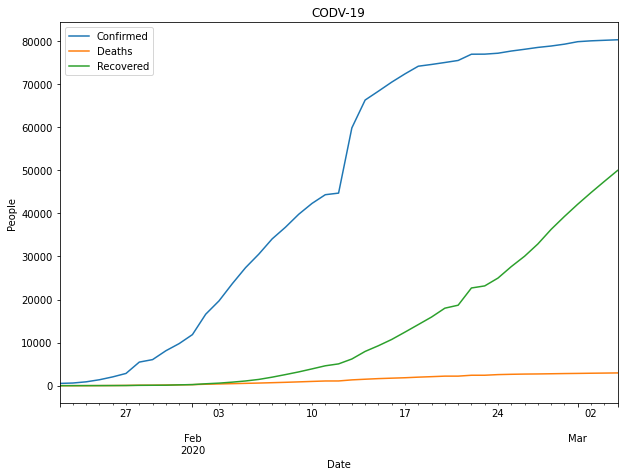

In [18]:
df_china.plot(figsize = (10,7), title = 'CODV-19')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

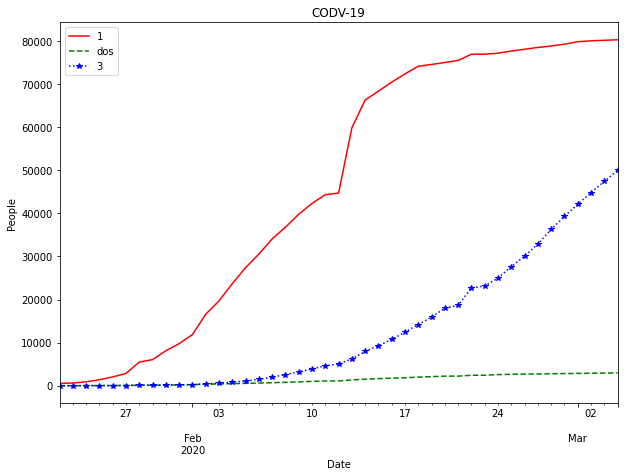

In [19]:
ax = df_china.plot(figsize = (10,7), title = 'CODV-19',
              legend = False,
              style = ['r-','g--','b:*'])
ax.legend(['1','dos','3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [20]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


<AxesSubplot:xlabel='ObservationDate'>

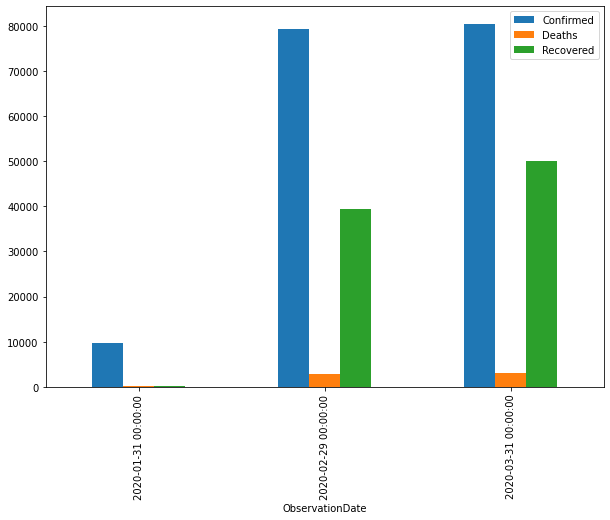

In [22]:
df_monthly.plot(figsize = (10,7), kind='bar')

<AxesSubplot:xlabel='ObservationDate'>

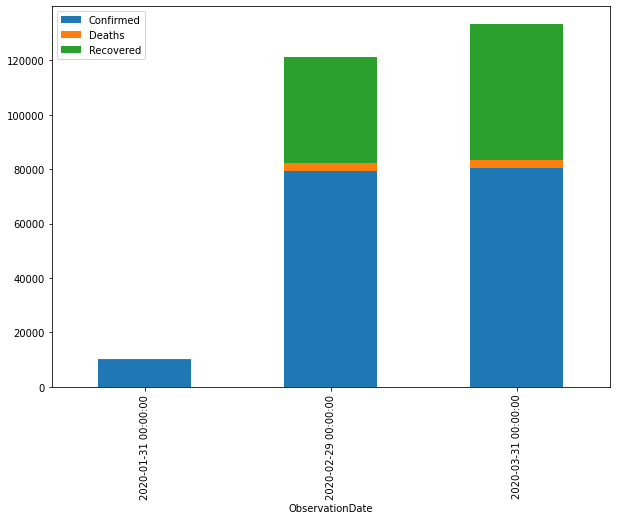

In [23]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked = True)

In [24]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths']- df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


array([<AxesSubplot:ylabel='2020-01-31 00:00:00'>,
       <AxesSubplot:ylabel='2020-02-29 00:00:00'>,
       <AxesSubplot:ylabel='2020-03-31 00:00:00'>], dtype=object)

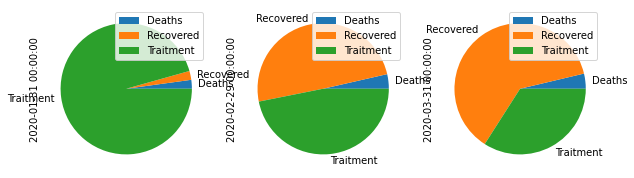

In [25]:
df_monthly[['Deaths', 'Recovered', 'Traitment']].T.plot(figsize = (10,7), kind = 'pie', subplots=True)

<AxesSubplot:>

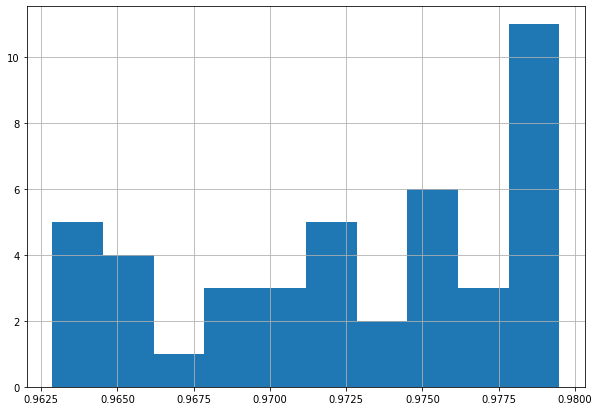

In [26]:
df_china['rate'] = 1- df_china['Deaths']/df_china['Confirmed']
df_china['rate'].hist(figsize = (10,7), bins = 10)

<AxesSubplot:ylabel='Density'>

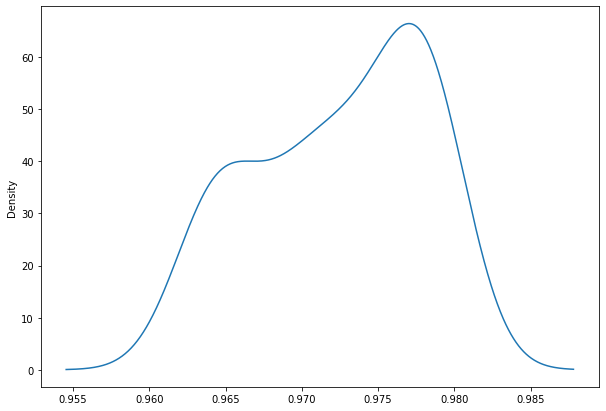

In [27]:
df_china['rate'].plot(kind = 'kde', figsize = (10,7))